In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.decomposition import PCA # Principal Component Analysis module
from sklearn.cluster import KMeans # KMeans clustering 
import matplotlib.pyplot as plt # Python defacto plotting library
import seaborn as sns # More snazzy plotting library
%matplotlib inline 

In [3]:
df=pd.read_csv('movie_metadata.csv')

In [4]:
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [5]:
df.shape

(5043, 28)

In [7]:
df=df.dropna(axis=0)

In [8]:
df.shape

(3756, 28)

In [10]:
str_list = [] # empty list to contain columns with strings (words)
for colname, colvalue in df.iteritems():
    if type(colvalue[1]) == str:
         str_list.append(colname)
# Get to the numeric columns by inversion            
num_list = df.columns.difference(str_list)

In [11]:
num_list

Index(['actor_1_facebook_likes', 'actor_2_facebook_likes',
       'actor_3_facebook_likes', 'aspect_ratio', 'budget',
       'cast_total_facebook_likes', 'director_facebook_likes', 'duration',
       'facenumber_in_poster', 'gross', 'imdb_score', 'movie_facebook_likes',
       'num_critic_for_reviews', 'num_user_for_reviews', 'num_voted_users',
       'title_year'],
      dtype='object')

In [12]:
df_num=df[num_list]

In [14]:
X = df_num.values
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

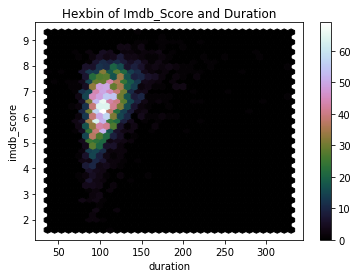

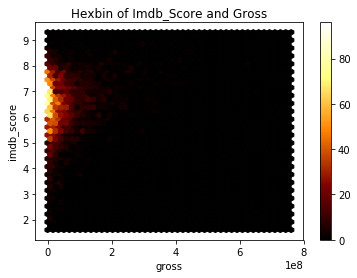

In [16]:
df.plot(y= 'imdb_score', x ='duration',kind='hexbin',gridsize=35, sharex=False, colormap='cubehelix', title='Hexbin of Imdb_Score and Duration')
df.plot(y= 'imdb_score', x ='gross',kind='hexbin',gridsize=45, sharex=False, colormap='afmhot', title='Hexbin of Imdb_Score and Gross')

,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,aspect_ratio,budget,cast_total_facebook_likes,director_facebook_likes,duration,facenumber_in_poster,gross,imdb_score,movie_facebook_likes,num_critic_for_reviews,num_user_for_reviews,num_voted_users,title_year
actor_1_facebook_likes,1.000000,0.391166,0.252408,0.056946,0.016418,0.944813,0.089630,0.083632,0.057387,0.144010,0.093597,0.130300,0.165986,0.121935,0.179590,0.096194
actor_2_facebook_likes,0.391166,1.000000,0.553755,0.063951,0.035715,0.642991,0.116058,0.128935,0.073098,0.252842,0.102372,0.232769,0.253125,0.187016,0.244822,0.122410
actor_3_facebook_likes,0.252408,0.553755,1.000000,0.046356,0.039966,0.489795,0.117405,0.125797,0.106189,0.299864,0.065544,0.271508,0.252782,0.205343,0.267762,0.117475
aspect_ratio,0.056946,0.063951,0.046356,1.000000,0.025264,0.068952,0.037528,0.153027,0.018988,0.063946,0.029979,0.110118,0.180230,0.098109,0.084626,0.216614
budget,0.016418,0.035715,0.039966,0.025264,1.000000,0.028682,0.018167,0.068012,-0.021673,0.099496,0.029190,0.052490,0.104717,0.070372,0.065927,0.047138
cast_total_facebook_likes,0.944813,0.642991,0.489795,0.068952,0.028682,1.000000,0.118547,0.120179,0.080687,0.235601,0.106803,0.205564,0.236533,0.178675,0.249119,0.127045
director_facebook_likes,0.089630,0.116058,0.117405,0.037528,0.018167,0.118547,1.000000,0.180644,-0.048067,0.138351,0.192314,0.161962,0.175128,0.217103,0.299624,-0.044656
duration,0.083632,0.128935,0.125797,0.153027,0.068012,0.120179,0.180644,1.000000,0.026919,0.245726,0.366221,0.215303,0.228631,0.351595,0.339592,-0.130211
facenumber_in_poster,0.057387,0.073098,0.106189,0.018988,-0.021673,0.080687,-0.048067,0.026919,1.000000,-0.032025,-0.065493,0.015185,-0.034365,-0.080971,-0.032209,0.070093
gross,0.144010,0.252842,0.299864,0.063946,0.099496,0.235601,0.138351,0.245726,-0.032025,1.000000,0.214740,0.366933,0.464187,0.544674,0.624949,0.054808


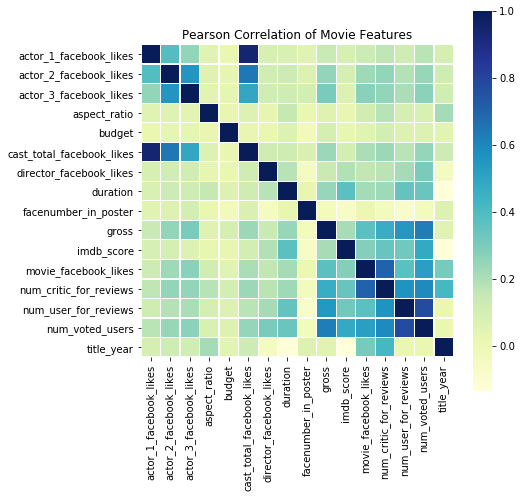

In [18]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(7, 7))
plt.title('Pearson Correlation of Movie Features')
# Draw the heatmap using seaborn
sns.heatmap(df_num.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="YlGnBu")
df_num.astype(float).corr()

In [19]:
mean_vec = np.mean(X_std, axis=0)
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

In [20]:
eig_pairs = [ (np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort from high to low
eig_pairs.sort(key = lambda x: x[0], reverse= True)

# Calculation of Explained Variance from the eigenvalues
tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)] # Individual explained variance
cum_var_exp = np.cumsum(var_exp) # Cumulative explained variance

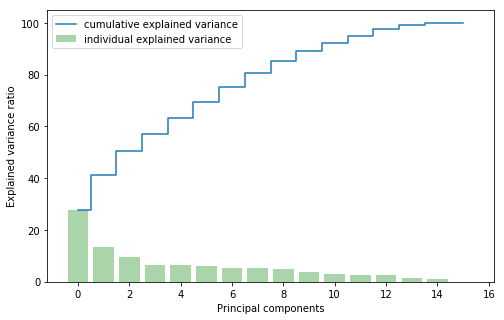

In [21]:
plt.figure(figsize=(8, 5))
plt.bar(range(16), var_exp, alpha=0.3333, align='center', label='individual explained variance', color = 'g')
plt.step(range(16), cum_var_exp, where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

In [22]:
pca = PCA(n_components=9)
x_9d = pca.fit_transform(X_std)

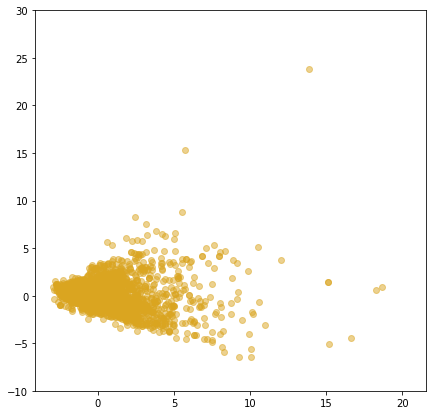

In [23]:
plt.figure(figsize = (7,7))
plt.scatter(x_9d[:,0],x_9d[:,1], c='goldenrod',alpha=0.5)
plt.ylim(-10,30)
plt.show()

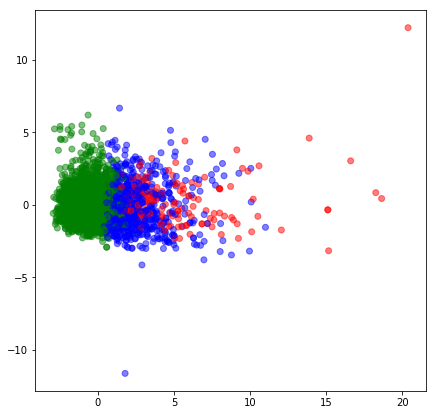

In [28]:
kmeans = KMeans(n_clusters=3)
# Compute cluster centers and predict cluster indices
X_clustered = kmeans.fit_predict(x_9d)

# Define our own color map
LABEL_COLOR_MAP = {0 : 'r',1 : 'g',2 : 'b'}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

# Plot the scatter digram
plt.figure(figsize = (7,7))
plt.scatter(x_9d[:,0],x_9d[:,2], c= label_color, alpha=0.5) 
plt.show()